imports

In [109]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



loading the dataset

In [110]:
file_path = 'heart.csv'
data = pd.read_csv(file_path)

understanding  the dataset

In [111]:
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             924 non-null    int64  
 1   Sex             924 non-null    object 
 2   ChestPainType   923 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     924 non-null    int64  
 5   FastingBS       924 non-null    int64  
 6   RestingECG      923 non-null    object 
 7   MaxHR           924 non-null    int64  
 8   ExerciseAngina  924 non-null    object 
 9   Oldpeak         924 non-null    float64
 10  ST_Slope        923 non-null    object 
 11  HeartDisease    923 non-null    float64
 12  id              924 non-null    int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 94.0+ KB


In [112]:
data_shape=data.shape
data_shape

(924, 13)

In [113]:
data_head = data.head() 
data_head


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,id
0,40,M,ATA,140.0,289,0,Normal,172,N,0.0,Up,0.0,1
1,49,F,NAP,160.0,180,0,Normal,156,N,1.0,Flat,1.0,2
2,37,M,ATA,130.0,283,0,ST,98,N,0.0,Up,0.0,3
3,48,F,ASY,138.0,214,0,Normal,108,Y,1.5,Flat,1.0,4
4,54,M,NAP,150.0,195,0,Normal,122,N,0.0,Up,0.0,5


In [114]:
data_describe = data.describe()
data_describe

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,id
count,924.000000,918.000000,924.000000,924.000000,924.000000,924.000000,923.000000,924.000000
mean,53.444805,132.382353,199.370130,0.231602,136.834416,0.884848,0.550379,456.715368
std,9.459739,18.509592,109.625262,0.422084,25.385941,1.065080,0.497725,266.527784
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,1.000000
25%,47.000000,120.000000,174.750000,0.000000,120.000000,0.000000,0.000000,225.750000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.550000,1.000000,456.500000
75%,60.000000,140.000000,267.000000,0.000000,155.250000,1.500000,1.000000,687.250000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,918.000000


Filtering dataset

In [115]:
# removing the id since it is not useful for our model 
data=data.drop(['id'],axis=1)
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             924 non-null    int64  
 1   Sex             924 non-null    object 
 2   ChestPainType   923 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     924 non-null    int64  
 5   FastingBS       924 non-null    int64  
 6   RestingECG      923 non-null    object 
 7   MaxHR           924 non-null    int64  
 8   ExerciseAngina  924 non-null    object 
 9   Oldpeak         924 non-null    float64
 10  ST_Slope        923 non-null    object 
 11  HeartDisease    923 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 86.8+ KB


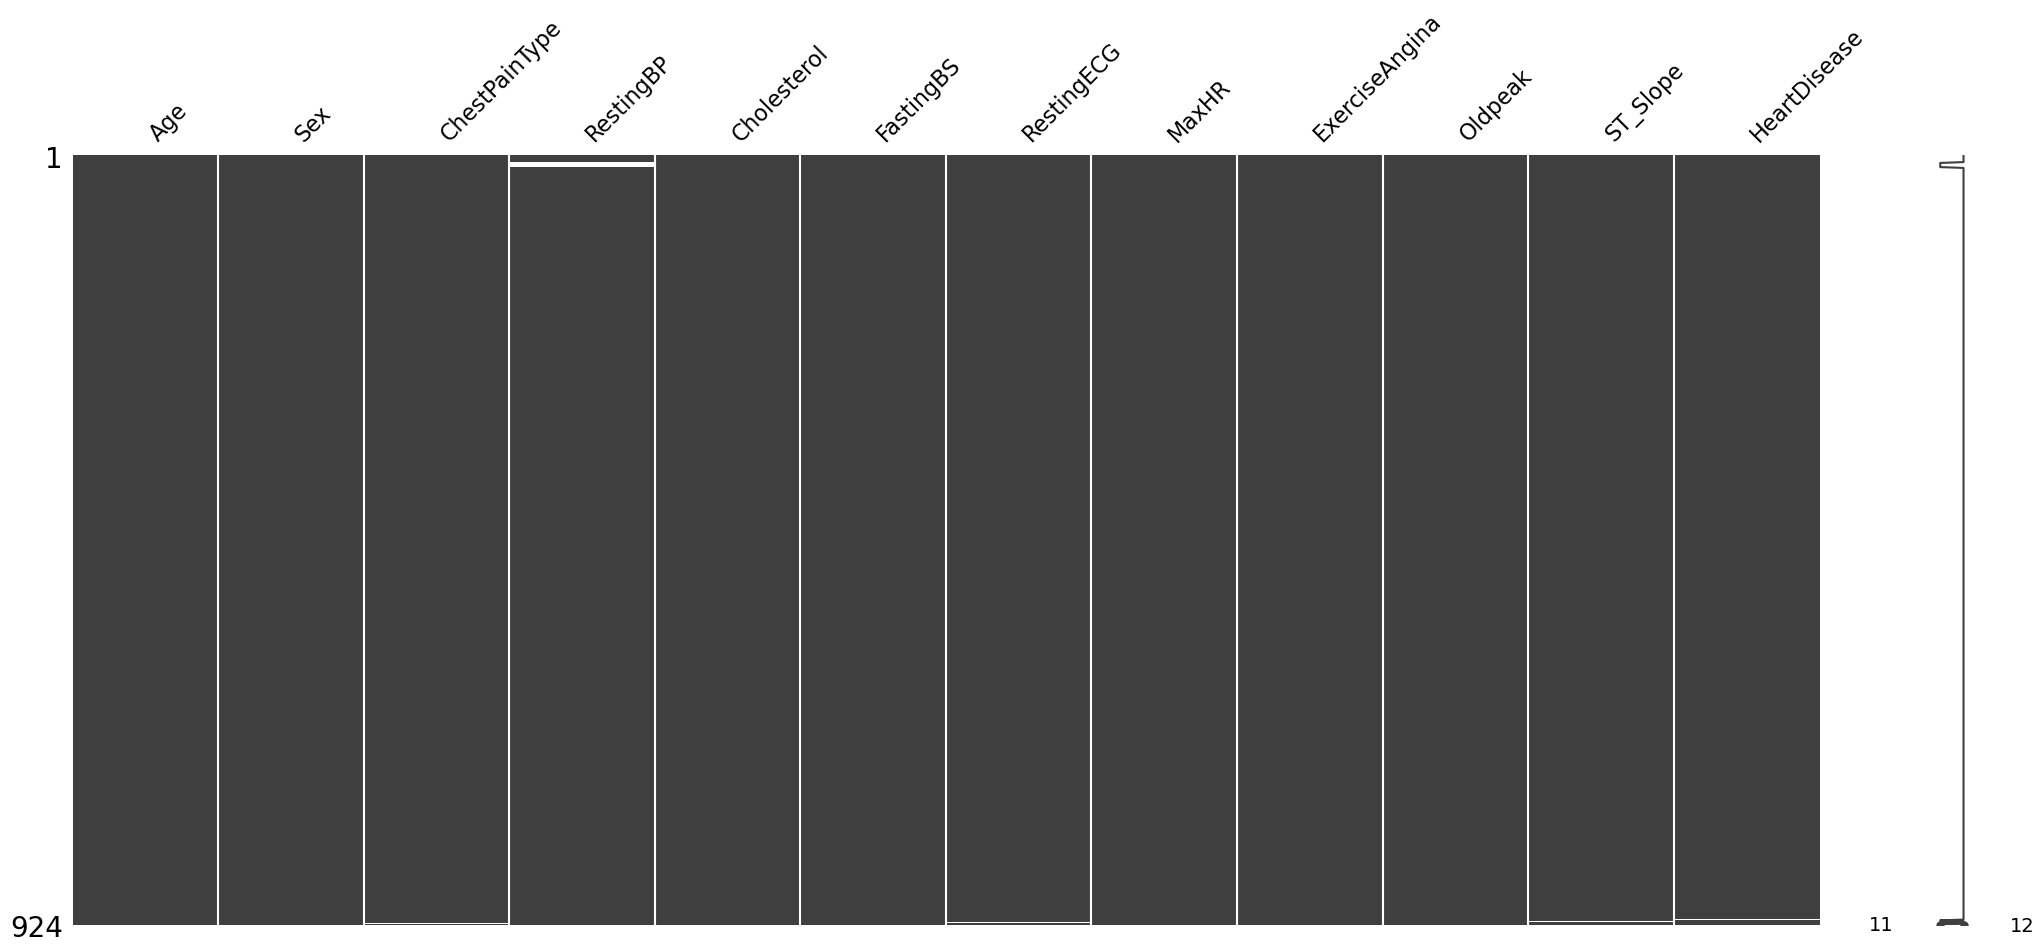

In [116]:
data.isnull()
data.isnull().sum()
msno.matrix(data)
plt.show()


handling missing values

In [117]:
# taking the average which have more than 5 missing values
data['RestingBP']= data['RestingBP'].fillna(data['RestingBP'].mean())
data.isnull().sum()

Age               0
Sex               0
ChestPainType     1
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        1
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          1
HeartDisease      1
dtype: int64

In [118]:
# drop rows with less then 5 missing values 
data=data.dropna()
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

handling duplicates

In [119]:
data.duplicated().sum()


6

In [120]:
data=data.drop_duplicates()
data.duplicated().sum()


0

changing text to integers

In [121]:
data['Sex'].unique()

array(['M', 'F'], dtype=object)

In [122]:
data['Sex']=data['Sex'].replace(['M','F'],[1,2])

C:\Users\micha\AppData\Local\Temp\ipykernel_24980\1349877312.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex']=data['Sex'].replace(['M','F'],[1,2])


In [123]:
data['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [124]:
data['ChestPainType']=data['ChestPainType'].replace(['ATA', 'NAP', 'ASY', 'TA'],[1,2,3,4])

C:\Users\micha\AppData\Local\Temp\ipykernel_24980\1990012646.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['ChestPainType']=data['ChestPainType'].replace(['ATA', 'NAP', 'ASY', 'TA'],[1,2,3,4])


In [125]:
data['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [126]:
data['ExerciseAngina']=data['ExerciseAngina'].replace(['N', 'Y'],[1,2])

C:\Users\micha\AppData\Local\Temp\ipykernel_24980\777557791.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['ExerciseAngina']=data['ExerciseAngina'].replace(['N', 'Y'],[1,2])


In [127]:
data['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [128]:
data['RestingECG']=data['RestingECG'].replace(['Normal', 'ST', 'LVH'],[1,2,3])

C:\Users\micha\AppData\Local\Temp\ipykernel_24980\3122473019.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['RestingECG']=data['RestingECG'].replace(['Normal', 'ST', 'LVH'],[1,2,3])


In [129]:
data['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [130]:
data['ST_Slope']=data['ST_Slope'].replace(['Up', 'Flat', 'Down'],[1,2,3])

C:\Users\micha\AppData\Local\Temp\ipykernel_24980\2737855698.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['ST_Slope']=data['ST_Slope'].replace(['Up', 'Flat', 'Down'],[1,2,3])


Data visualization and relationship

In [131]:
data['Age'].value_counts(normalize=True)

Age
54    0.055799
58    0.045952
55    0.044858
56    0.041575
52    0.039387
57    0.039387
51    0.038293
62    0.038293
59    0.037199
53    0.036105
60    0.035011
48    0.033917
61    0.033917
63    0.032823
50    0.027352
46    0.026258
41    0.026258
43    0.026258
64    0.024070
65    0.022976
49    0.022976
47    0.020788
44    0.020788
42    0.019694
45    0.018600
38    0.017505
67    0.016411
39    0.016411
66    0.014223
69    0.014223
40    0.014223
35    0.012035
37    0.012035
68    0.010941
34    0.007659
74    0.007659
70    0.007659
36    0.006565
71    0.005470
32    0.005470
72    0.004376
29    0.003282
75    0.003282
33    0.002188
77    0.002188
76    0.002188
31    0.002188
30    0.001094
28    0.001094
73    0.001094
Name: proportion, dtype: float64

<Axes: xlabel='Age'>

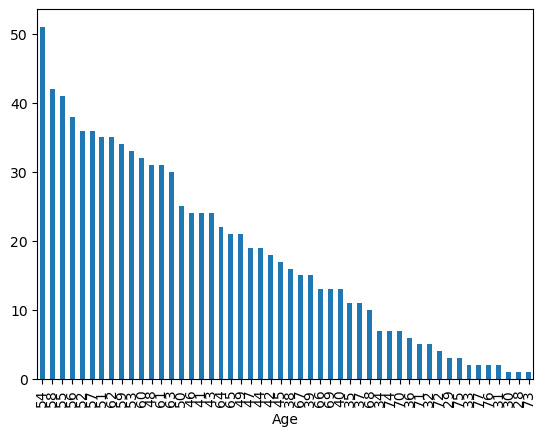

In [132]:
data['Age'].value_counts().plot(kind='bar')

<Axes: xlabel='Sex'>

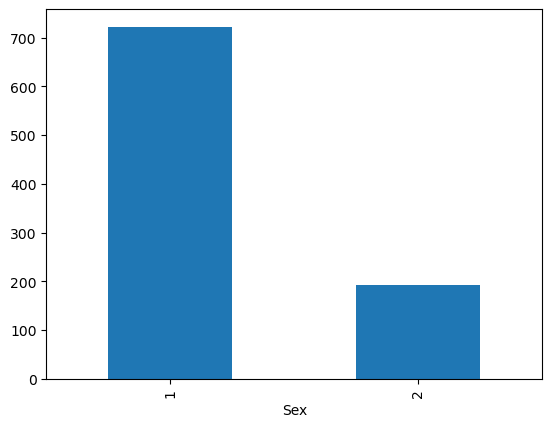

In [133]:
data['Sex'].value_counts().plot(kind='bar')

In [134]:
# Mean of HeartDisease grouped by Sex
data.groupby('Sex')["HeartDisease"].mean()

Sex
1    0.630194
2    0.255208
Name: HeartDisease, dtype: float64

<Axes: xlabel='Sex'>

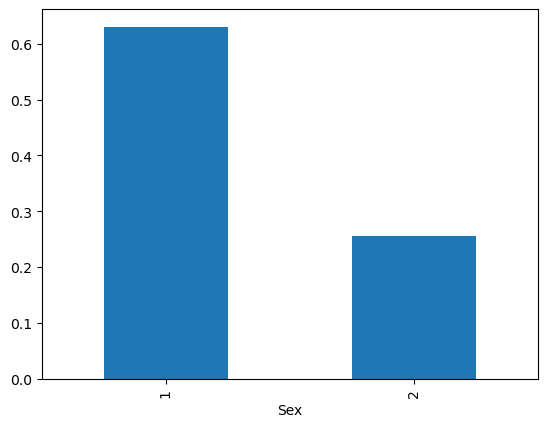

In [135]:
# Mean of HeartDisease grouped by Sex
data.groupby('Sex')["HeartDisease"].mean().plot(kind='bar')

In [136]:
# Mean of HeartDisease grouped by Age
data.groupby('Age')["HeartDisease"].mean()

Age
28    0.000000
29    0.000000
30    0.000000
31    0.500000
32    0.400000
33    0.500000
34    0.285714
35    0.363636
36    0.333333
37    0.090909
38    0.687500
39    0.133333
40    0.461538
41    0.250000
42    0.166667
43    0.458333
44    0.315789
45    0.117647
46    0.541667
47    0.578947
48    0.483871
49    0.523810
50    0.560000
51    0.428571
52    0.527778
53    0.454545
54    0.450980
55    0.585366
56    0.657895
57    0.666667
58    0.666667
59    0.647059
60    0.750000
61    0.838710
62    0.714286
63    0.766667
64    0.681818
65    0.714286
66    0.538462
67    0.800000
68    0.600000
69    0.769231
70    0.857143
71    0.400000
72    0.750000
73    1.000000
74    0.714286
75    0.666667
76    0.500000
77    1.000000
Name: HeartDisease, dtype: float64

<Axes: xlabel='Age'>

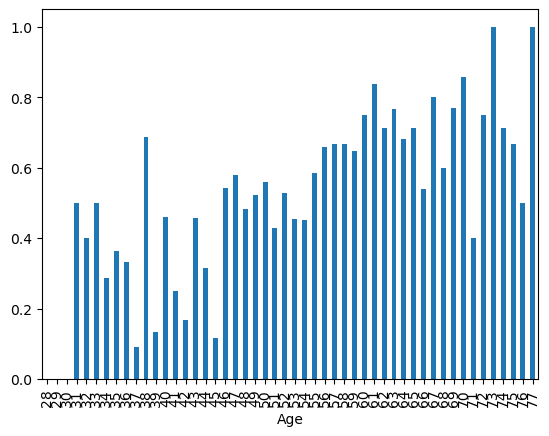

In [137]:
# Mean of HeartDisease grouped by Age
data.groupby('Age')["HeartDisease"].mean().plot(kind='bar')

In [138]:
# Mean of HeartDisease grouped by ChestPainType
data.groupby('ChestPainType')["HeartDisease"].mean()

ChestPainType
1    0.133721
2    0.354680
3    0.789474
4    0.422222
Name: HeartDisease, dtype: float64

<Axes: xlabel='ChestPainType'>

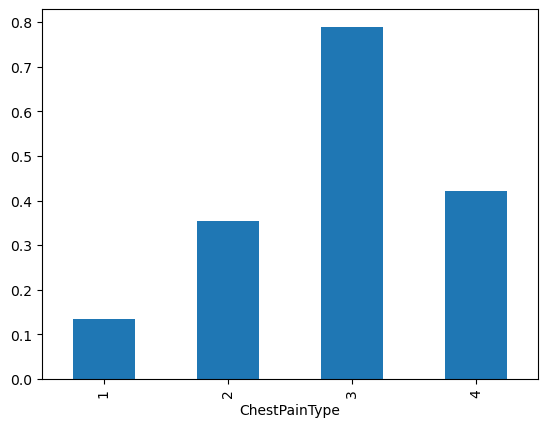

In [139]:
# Mean of HeartDisease grouped by ChestPainType
data.groupby('ChestPainType')["HeartDisease"].mean().plot(kind='bar')

In [140]:

# Mean of HeartDisease grouped by RestingBP
data.groupby('RestingBP')["HeartDisease"].mean()

RestingBP
0.0      1.0
80.0     0.0
92.0     1.0
94.0     0.0
95.0     1.0
        ... 
180.0    0.5
185.0    1.0
190.0    0.5
192.0    1.0
200.0    1.0
Name: HeartDisease, Length: 67, dtype: float64

<Axes: xlabel='RestingBP'>

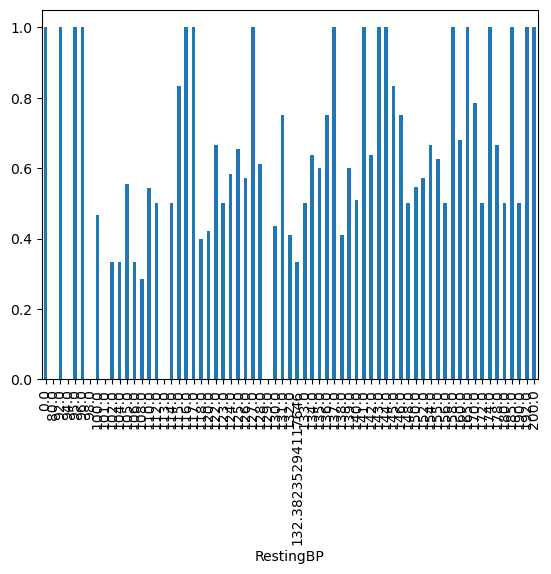

In [141]:

# Mean of HeartDisease grouped by RestingBP
data.groupby('RestingBP')["HeartDisease"].mean().plot(kind='bar')

In [142]:
# Mean of HeartDisease grouped by Cholesterol
data.groupby('Cholesterol')["HeartDisease"].mean()

Cholesterol
0      0.883721
85     0.000000
100    0.500000
110    1.000000
113    1.000000
         ...   
491    1.000000
518    1.000000
529    1.000000
564    0.000000
603    1.000000
Name: HeartDisease, Length: 220, dtype: float64

<Axes: xlabel='Cholesterol'>

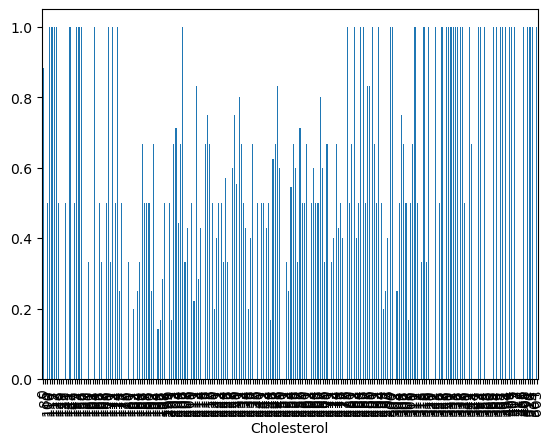

In [143]:
# Mean of HeartDisease grouped by Cholesterol
data.groupby('Cholesterol')["HeartDisease"].mean().plot(kind='bar')

In [144]:
# Mean of HeartDisease grouped by FastingBS
data.groupby('FastingBS')["HeartDisease"].mean()

FastingBS
0    0.477889
1    0.793427
Name: HeartDisease, dtype: float64

<Axes: xlabel='FastingBS'>

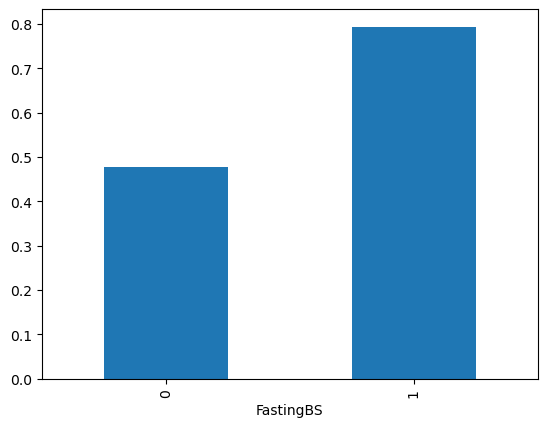

In [145]:
# Mean of HeartDisease grouped by FastingBS
data.groupby('FastingBS')["HeartDisease"].mean().plot(kind='bar')

In [146]:
# Mean of HeartDisease grouped by RestingECG
data.groupby('RestingECG')["HeartDisease"].mean()


RestingECG
1    0.514545
2    0.657303
3    0.559140
Name: HeartDisease, dtype: float64

<Axes: xlabel='RestingECG'>

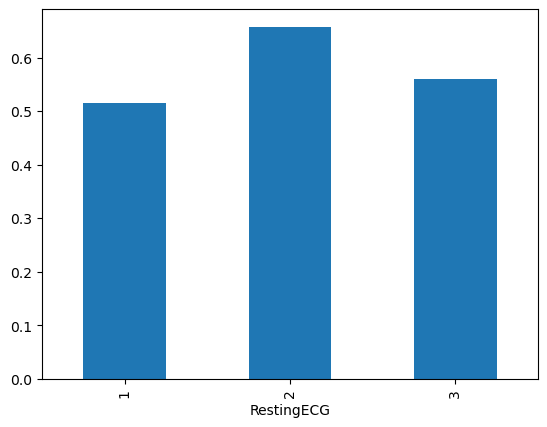

In [147]:
# Mean of HeartDisease grouped by RestingECG
data.groupby('RestingECG')["HeartDisease"].mean().plot(kind='bar')


In [148]:


# Mean of HeartDisease grouped by MaxHR
data.groupby('MaxHR')["HeartDisease"].mean()

MaxHR
60     1.0
63     1.0
67     1.0
69     0.0
70     1.0
      ... 
190    0.0
192    0.0
194    0.0
195    1.0
202    0.0
Name: HeartDisease, Length: 119, dtype: float64

<Axes: xlabel='MaxHR'>

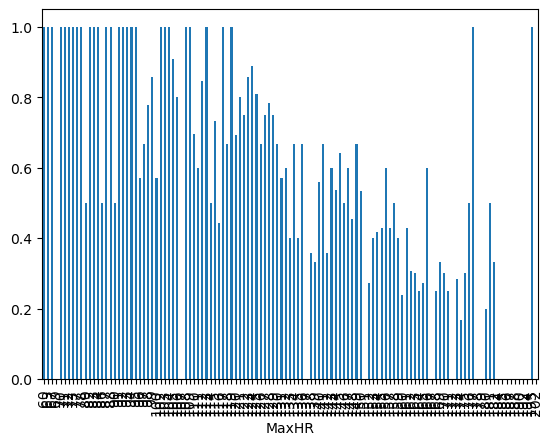

In [149]:


# Mean of HeartDisease grouped by MaxHR
data.groupby('MaxHR')["HeartDisease"].mean().plot(kind='bar')

In [150]:

# Mean of HeartDisease grouped by ExerciseAngina
data.groupby('ExerciseAngina')["HeartDisease"].mean()

ExerciseAngina
1    0.347426
2    0.851351
Name: HeartDisease, dtype: float64

<Axes: xlabel='ExerciseAngina'>

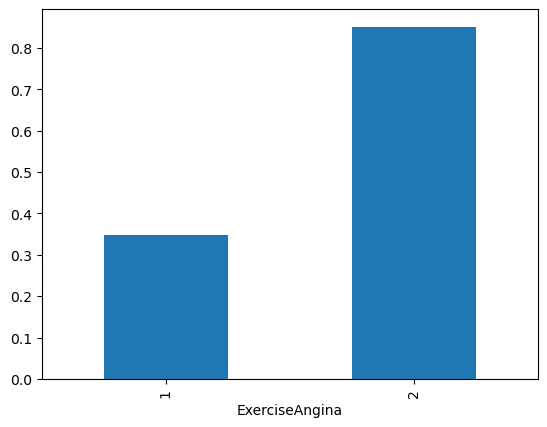

In [151]:

# Mean of HeartDisease grouped by ExerciseAngina
data.groupby('ExerciseAngina')["HeartDisease"].mean().plot(kind='bar')

In [152]:

# Mean of HeartDisease grouped by Oldpeak
data.groupby('Oldpeak')["HeartDisease"].mean()



Oldpeak
-2.6    1.000000
-2.0    1.000000
-1.5    1.000000
-1.1    0.000000
-1.0    1.000000
-0.9    1.000000
-0.8    1.000000
-0.7    1.000000
-0.5    0.500000
-0.1    0.000000
 0.0    0.335150
 0.1    0.357143
 0.2    0.181818
 0.3    0.272727
 0.4    0.181818
 0.5    0.631579
 0.6    0.285714
 0.7    0.714286
 0.8    0.500000
 0.9    0.750000
 1.0    0.694118
 1.1    0.714286
 1.2    0.708333
 1.3    0.714286
 1.4    0.666667
 1.5    0.792453
 1.6    0.500000
 1.7    1.000000
 1.8    0.823529
 1.9    0.714286
 2.0    0.815789
 2.1    1.000000
 2.2    1.000000
 2.3    0.000000
 2.4    0.750000
 2.5    1.000000
 2.6    0.857143
 2.8    1.000000
 2.9    1.000000
 3.0    0.892857
 3.1    1.000000
 3.2    1.000000
 3.4    1.000000
 3.5    0.500000
 3.6    1.000000
 3.7    1.000000
 3.8    1.000000
 4.0    1.000000
 4.2    0.500000
 4.4    1.000000
 5.0    1.000000
 5.6    1.000000
 6.2    1.000000
Name: HeartDisease, dtype: float64

<Axes: xlabel='Oldpeak'>

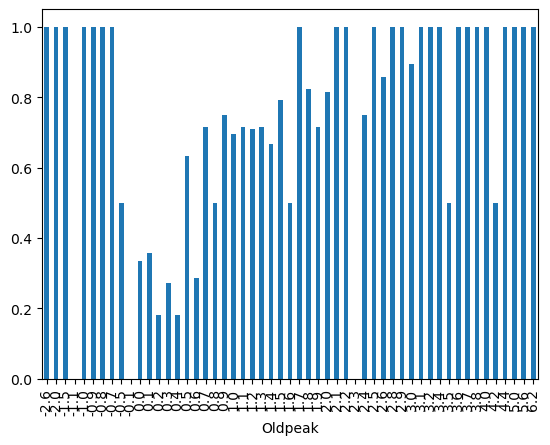

In [153]:
data.groupby('Oldpeak')["HeartDisease"].mean().plot(kind='bar')

In [154]:

# Mean of HeartDisease grouped by ST_Slope
data.groupby('ST_Slope')["HeartDisease"].mean()


ST_Slope
1    0.197468
2    0.826754
3    0.777778
Name: HeartDisease, dtype: float64

<Axes: xlabel='ST_Slope'>

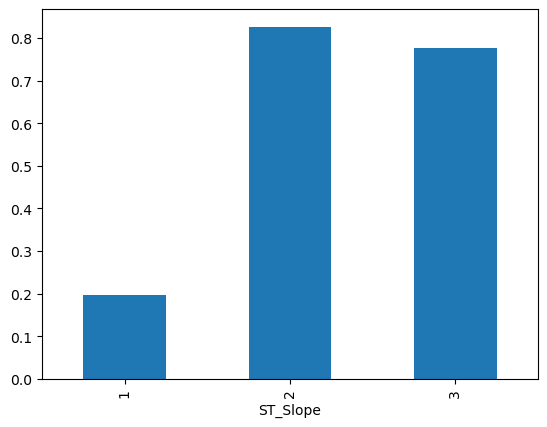

In [155]:

# Mean of HeartDisease grouped by ST_Slope
data.groupby('ST_Slope')["HeartDisease"].mean().plot(kind='bar')


Handle Outliers and Fix Data Inconsistencies


In [ ]:
data = data[data['cholesterol'] < data['cholesterol'].quantile(0.95)]
data['sex'] = data['sex'].str.lower()  # Convert to lowercase.
data['sex'] = data['sex'].replace({'m': 1, 'f': 0})
data_info = data.info()
data_info

Analyze relationship Between Variables

In [ ]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Cholesterol')
plt.show()
sns.pairplot(data)
plt.show()


Visualize Data Distribution

In [ ]:
data['age'].hist(bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
sns.boxplot(data['cholesterol'])
plt.show()


Check Target Variable Distribution

In [ ]:
sns.countplot(data['target'])
plt.show()

 Feature Insights

In [ ]:
sns.boxplot(x='target', y='cholesterol', data=data)
plt.show()
# print(data.groupby('target').mean())


Separate Features and Target

In [ ]:
X = data.drop('target', axis=1) 
y = data['target']               

Separating Training and Testing Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model training

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

saving the model

In [ ]:
joblib.dump(model, 'heart_disease_model.pkl')

Make Predictions

In [ ]:
y_pred = model.predict(X_test)

Evaluate the Model

In [ ]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))